In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

from indicator import Indicator
from preparation import Preparation
from ANN import ANN

In [110]:
# initial value
TRAIN_PATH = 'data/test_set/FB-18.csv'
TEST_PATH = 'data/test_set/FB-20.csv'

N_IN = 500  # number of date for training
N_OUT = 3  # number of date for predict
DIM = 6  # dimension for baseline model

EPOCH = 100
BATCH = 10

PARTICLE = 10  # number of PSO particle
ITERATION = 10  # number of PSO iteration
C1 = 1
C2 = 2
W = 0.01

In [111]:
# train data
read_data = pd.read_csv(TRAIN_PATH)
read_data['change'] = ((read_data['Close'] - read_data['Close'].shift(1))/read_data['Close'].shift(1)) * 100
read_data.drop(['Adj Close'], axis=1, inplace=True)
read_data.drop([0], inplace=True)

In [112]:
# scale data
from sklearn.preprocessing import MinMaxScaler
read_data.drop(['Date'], axis=1, inplace=True)
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(read_data)
c_train = training_set_scaled[: int(read_data.shape[0] *0.8), :]
c_test = training_set_scaled[int(read_data.shape[0]*0.8):, :]

In [113]:
train_X = c_train[:, :5]
train_y = c_train[:, 5:]

test_X = c_test[:, :5]
test_y = c_test[:, 5:]

In [114]:
base_line_model = Sequential()
base_line_model.add(Dense(128, input_shape=(train_X.shape[1], ), activation='relu'))
base_line_model.add(Dense(128*2, activation='relu'))
base_line_model.add(Dense(1, activation='linear'))
base_line_model.compile(optimizer='adam', loss='mean_squared_error')
history = base_line_model.fit(train_X, train_y, epochs=EPOCH,  batch_size=BATCH, validation_split=0.2)

Epoch 1/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0979 - val_loss: 0.1157
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.0323
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0044 - val_loss: 0.0202
Epoch 4/100
42/42 [==============================] - 0s 10ms/step - loss: 0.002

In [115]:
predict = base_line_model.predict(test_X)

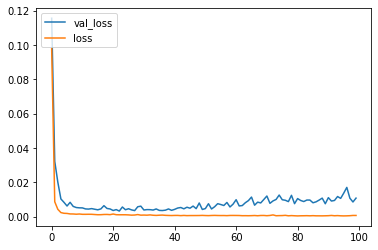

In [116]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper left')
plt.show()

In [117]:
data_test = np.concatenate([test_X, test_y], axis=1)
data_predict = np.concatenate([test_X, predict], axis=1)
transform_test = sc.inverse_transform(data_test)
transform_predict = sc.inverse_transform(data_predict)

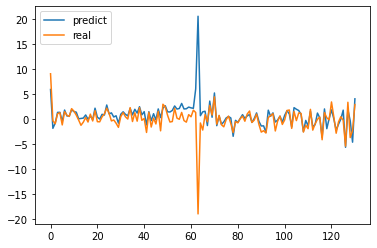

In [118]:
plt.plot(transform_predict[:, 5], label='predict')
plt.plot(transform_test[:, 5], label='real')
plt.legend(loc='upper left')
plt.show()

In [126]:
#test data
test_data = pd.read_csv(TEST_PATH)
test_data['change'] = ((test_data['Close'] - test_data['Close'].shift(1))/test_data['Close'].shift(1)) * 100
test_data.drop(['Adj Close', 'Date'], axis=1, inplace=True)
test_data.drop([0], inplace=True)

sc = MinMaxScaler(feature_range=(0, 1))
test_set_scaled = sc.fit_transform(test_data)

In [127]:
test_set = test_set_scaled[:5, :]

test_set_X = test_set[:, :5]
test_set_y = test_set[:, 5:]

test_predict = base_line_model.predict(test_set_X)

In [128]:
data_test_set = np.concatenate([test_set_X, test_set_y], axis=1)
data_test_predict = np.concatenate([test_set_X, test_predict], axis=1)
transform_test_set = sc.inverse_transform(data_test_set)
transform_test_predict = sc.inverse_transform(data_test_predict)

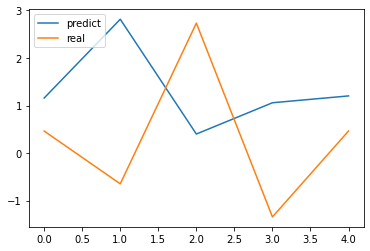

In [129]:
plt.plot(transform_test_predict[:, 5], label='predict')
plt.plot(transform_test_set[:, 5], label='real')
plt.legend(loc='upper left')
plt.show()
